# Sports Dataset

10,000 random photos from soccer matches captured at a single timestamp make up the dataset. Every snapshot has a number of elements that offer details on the current match. The objective of the dataset is to capture the evolving dynamics of a soccer game, and to make predictions for the number of goals that will be scored for the remaining playing time.

# Dataset Structure

The dataset is presented in a single file with 10,000 rows and 20 columns, each row representing a snapshot of a soccer match, and each column representing a specific attribute or feature of that snapshot.

Number of Instances (Rows): 10,000 instances 
Number of Features (Columns): 20 features/columns 

# Feature Representation

The features include identifiers such as uuid, and dynamic match-related details such as the current minute of play, home and away team scores, yellow and red cards for both teams, the number of attacks and dangerous attacks by each team, corners awarded, shots on and off target for both teams, and the ball possession percentage for both the home and away teams until the current minute.

# Libraries

- pandas
- numpy
- matplotlib
- pickle
- os
- sklearn.neighbors KNeighborsClassifier
- sklearn.metrics accuracy_score, classification_report, mean_squared_error, r2_score
- sklearn.model_selection cross_val_predict, cross_val_score, train_test_split
- sklearn preprocessing 
- sklearn.linear_model LinearRegression

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

In [2]:
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.colheader_justify','right')
pd.set_option('display.width', 100)
pd.set_option("display.max_colwidth", 30)
df = pd.read_csv(filepath_or_buffer = 'sports.csv', header = 0)
pd.set_option("display.max_rows", df.shape[0])
df.sort_values(by = "current_minute", axis = 0)

uuid  current_minute  home_score  away_score  home_yellow_cards  \
1071  f36ec793-d162-437c-acb1-e6...            -348           0           3                  1   
3360  6bbf7f66-3e0c-4f4f-a258-05...            -253           0           0                  0   
4989  6868d172-df91-4db2-835e-d1...            -253           0           0                  0   
5446  b08075cf-3c52-4703-818c-95...            -219           0           0                  0   
5410  0d3426bd-a197-4ca6-815a-c8...            -139           0           0                  0   
1980  e98853d5-db8f-4d93-882b-78...             -96           1           0                  0   
5760  79fa691c-284f-4921-88b3-59...             -12           0           0                  0   
4639  a1f36e6d-1b3e-4c76-87fd-6d...              -7           0           1                  0   
5734  2ec324f7-7776-4b50-96a3-99...              -2           0           0                  0   
4863  5c5d6983-a830-4756-a210-96...              -1           0           0                  0   
5732  73d72462-729b-4ddd-ac51-b1...              -1           0           0                  0   
5700  50593611-23c0-4239-b8fb-df...              -1           0           0                  0   
6366  cda33915-2999-4a2e-920c-bc...              -1           0           0                  0   
3300  d03f0776-4244-4cb7-b7ef-f7...              -1           0           0                  0   
1556  63a8abac-30fb-404e-b38c-2e...               0           0           0                  0   
1761  ac358c59-7f89-4751-8fe9-43...               0           0           0                  0   
50    29244bdc-594c-4379-826c-ef...               0           0           0                  0   
5413  ed9439c1-d942-4105-b212-b7...               0           0           0                  0   
2272  640fcd70-e4a5-4dfe-8eb5-a7...               0           0           0                  0   
2602  7702ec49-e676-46e0-8b03-49...               0           0           0                  0   
4331  3dfa009f-4075-4848-89fd-a4...               0           0           0                  0   
2554  2b564c49-712b-4b1e-a110-1d...               0           0           0                  0   
4807  1e4e25b4-1dde-47b3-ad23-14...               0           0           0                  0   
3144  9bca0342-d2f6-4b5f-9632-8e...               0           0           0                  0   
2225  6556cb5c-93f7-476b-919e-ea...               0           0           0                  0   
2620  55a5fa35-89cd-479f-8415-b4...               0           0           0                  0   
4058  afa8ea6c-d472-4bec-a41a-81...               0           0           0                  0   
4336  3f52a12e-2735-4eb3-976d-67...               0           0           0                  0   
6990  cadfb057-bbc5-436c-9851-b0...               0           0           0                  0   
3638  0fafe7a4-5f20-4fc2-819e-a5...               0           0           0                  0   
5718  99a2c9c1-8892-4061-8547-b1...               0           0           0                  0   
6161  d34d866a-e626-4335-9707-81...               0           0           0                  0   
728   a41c67b2-72e8-467a-860d-6b...               1           0           0                  1   
6991  67ed7cad-4a17-4804-a2e0-c1...               1           0           0                  0   
896   3a5af71b-645a-43ee-b41a-4d...               1           0           0                  0   
5440  876a529e-97fd-42c9-99aa-73...               1           0           0                  0   
6419  76345b00-e0cd-4dd9-92e1-4c...               1           1           0                  0   
2648  90d64cf8-cdc3-4122-82d0-ba...               1           0           0                  0   
3913  1a2b762a-46ea-4ef8-9a9d-fd...               1           0           0                  0   
782   fce00d25-a5b4-4510-88c1-45...               1           0           0                  0   
1036  343d23f

# Data Preprocessing
Our objective for this project is to use the data given in the dataset to predict whether 1 or more goals can be scored in the remaining playing time of the match.

In [3]:
# Handling Missing Data
df.dropna(inplace=True)
df = df.drop(['uuid'], axis=1)

# Feature Scaling
numerical_features = ['current_minute', 'home_score', 'away_score', 'home_yellow_cards', 'away_yellow_cards',
                      'home_red_cards', 'away_red_cards', 'home_attacks', 'away_attacks', 'home_dangerous_attacks',
                      'away_dangerous_attacks', 'home_corners', 'away_corners', 'home_off_target', 'away_off_target',
                      'home_on_target', 'away_on_target', 'home_possession', 'away_possession']

In [4]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Create variables for the remaining time and the target
# the target variable indicates whether 1 goal or more will be scored with the remaining time of the match. it shows binary values
df['remaining_time'] = 105 - df['current_minute']
df['target'] = (df['home_score'] - df['away_score'] >= 1).astype(int)

# Split the Data
X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [5]:
# Current shape of our X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (7000, 21)
Shape of y: (7000,)


# Exploratory Data Analysis

This is the content of the dataset

In [6]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


current_minute  home_score  away_score  home_yellow_cards  away_yellow_cards  home_red_cards  \
0        0.963241    0.190578    1.491426          -0.566535          -0.592508       -0.095344   
1        0.879501    1.124785   -0.674995          -0.566535          -0.592508       -0.095344   
2       -1.576861   -0.743629   -0.674995          -0.566535          -0.592508       -0.095344   
3       -1.186076   -0.743629   -0.674995           0.517891          -0.592508       -0.095344   
4        0.460803    0.190578   -0.674995           0.517891          -0.592508       -0.095344   

   away_red_cards  home_attacks  away_attacks  home_dangerous_attacks  ...  away_corners  \
0       -0.125202     -0.204582      0.050107                0.060435  ...     -0.452444   
1       -0.125202     -1.287845     -1.296155               -1.201740  ...     -0.907488   
2       -0.125202     -1.204517     -1.266238               -1.158217  ...     -0.907488   
3       -0.125202     -0.149030      0.080024               -0.722984  ...     -0.907488   
4       -0.125202      0.628697      1.037365               -0.287751  ...     -0.452444   

   home_off_target  away_off_target  home_on_target  away_on_target  home_possession  \
0         0.295249        -0.943533        0.787799        2.075171        -0.340329   
1        -0.971720        -0.943533       -0.936184       -0.886538        -0.150428   
2        -0.971720        -0.943533       -0.936184       -0.886538         0.988975   
3        -0.971720        -0.215579       -0.936184       -0.886538         0.324323   
4        -0.971720         0.148399        0.787799        1.087934        -0.625180   

   away_possession  final_delta  remaining_time  target  
0         0.340563            1      104.036759       0  
1         0.150698            1      104.120499       1  
2        -0.988489            4      106.576861       0  
3        -0.323963            2      106.186076       0  
4         0.625360            0      104.539197       0  

[5 rows x 22 columns]

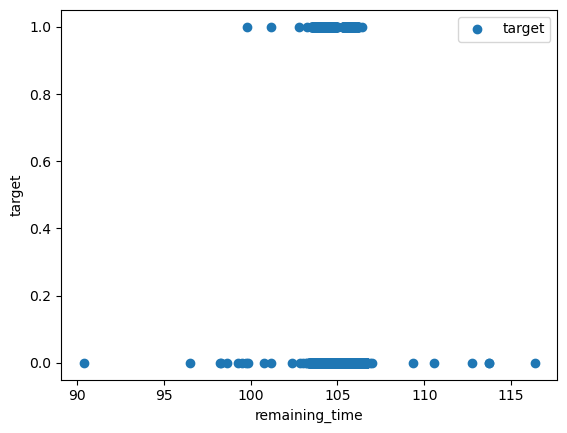

In [7]:
df.plot(x='remaining_time', y='target', style='o')
plt.xlabel('remaining_time')
plt.ylabel('target')
plt.show()

Basic summary statistics for numerical values

In [8]:
print("\nSummary statistics of numerical features:")
df.describe()


Summary statistics of numerical features:


current_minute    home_score    away_score  home_yellow_cards  away_yellow_cards  \
count    7.000000e+03  7.000000e+03  7.000000e+03       7.000000e+03       7.000000e+03   
mean     7.308440e-17 -1.522592e-17  8.628019e-18      -7.283063e-17       3.552714e-17   
std      1.000071e+00  1.000071e+00  1.000071e+00       1.000071e+00       1.000071e+00   
min     -1.137440e+01 -7.436289e-01 -6.749948e-01      -5.665354e-01      -5.925084e-01   
25%     -8.790308e-01 -7.436289e-01 -6.749948e-01      -5.665354e-01      -5.925084e-01   
50%      2.933240e-01 -7.436289e-01 -6.749948e-01      -5.665354e-01      -5.925084e-01   
75%      7.957617e-01  1.905783e-01  4.082156e-01       5.178911e-01       3.898598e-01   
max      1.461280e+01  6.730029e+00  9.073899e+00       8.108876e+00       7.266437e+00   

       home_red_cards  away_red_cards  home_attacks  away_attacks  home_dangerous_attacks  ...  \
count    7.000000e+03    7.000000e+03  7.000000e+03  7.000000e+03            7.000000e+03  ...   
mean    -2.892924e-17    7.409946e-17 -2.943677e-17 -9.643080e-18           -5.785848e-17  ...   
std      1.000071e+00    1.000071e+00  1.000071e+00  1.000071e+00            1.000071e+00  ...   
min     -9.534369e-02   -1.252023e-01 -1.287845e+00 -1.296155e+00           -1.201740e+00  ...   
25%     -9.534369e-02   -1.252023e-01 -8.712054e-01 -8.773183e-01           -8.535540e-01  ...   
50%     -9.534369e-02   -1.252023e-01 -9.347806e-02 -6.956114e-02           -1.136580e-01  ...   
75%     -9.534369e-02   -1.252023e-01  6.842493e-01  7.082791e-01            6.262380e-01  ...   
max      2.044022e+01    1.580963e+01  5.795029e+00  4.178643e+00            4.630381e+00  ...   

       away_corners  home_off_target  away_off_target  home_on_target  away_on_target  \
count  7.000000e+03     7.000000e+03     7.000000e+03    7.000000e+03    7.000000e+03   
mean   2.588406e-17    -8.069735e-17     9.846092e-17    7.105427e-18   -5.278317e-17   
std    1.000071e+00     1.000071e+00     1.000071e+00    1.000071e+00    1.000071e+00   
min   -9.074882e-01    -9.717201e-01    -9.435331e-01   -9.361844e-01   -8.865382e-01   
25%   -9.074882e-01    -9.717201e-01    -9.435331e-01   -9.361844e-01   -8.865382e-01   
50%   -4.524440e-01    -3.382355e-01    -2.155785e-01   -7.419284e-02   -3.929201e-01   
75%    4.576445e-01     6.119913e-01     5.123760e-01    3.568029e-01    5.943163e-01   
max    7.283308e+00     6.630095e+00     5.608058e+00    8.545723e+00    8.492207e+00   

       home_possession  away_possession  final_delta  remaining_time       target  
count     7.000000e+03     7.000000e+03  7000.000000     7000.000000  7000.000000  
mean      1.517516e-16     3.161915e-16     1.416857      105.000000     0.118286  
std       1.000071e+00     1.000071e+00     1.419035        1.000071     0.322969  
min      -4.897941e+00    -4.595915e+00    -2.000000       90.387200     0.000000  
25%      -5.302293e-01    -6.087599e-01     0.000000      104.204238     0.000000  
50%      -5.547807e-02     5.576592e-02     1.000000      104.706676     0.000000  
75%       6.091737e-01     5.304272e-01     2.000000      105.879031     0.000000  
max       4.597084e+00     4.897311e+00    10.000000      116.374397     1.000000  

[8 rows x 22 columns]

Scatterplot matrix for pairs of numerical features


Pairplot for numerical features:


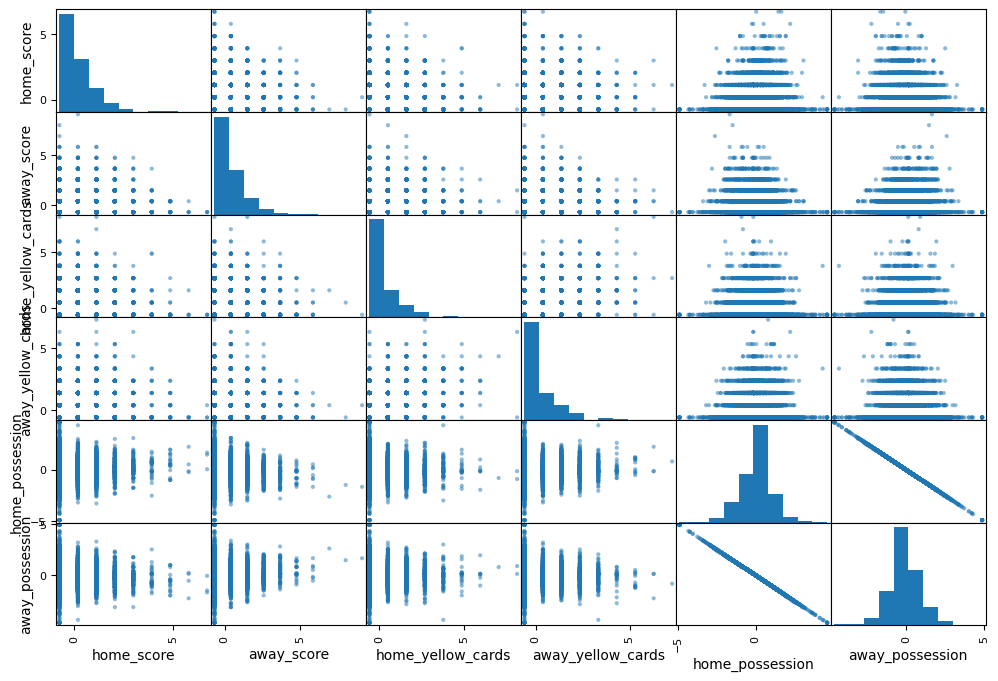

In [9]:
print("\nPairplot for numerical features:")
scatter_matrix = pd.plotting.scatter_matrix(df[['home_score', 'away_score', 'home_yellow_cards', 'away_yellow_cards', 'home_possession', 'away_possession']], figsize=(12, 8))
plt.show()

Histogram that shows the distribution of home and away scores


Distribution of home and away scores:


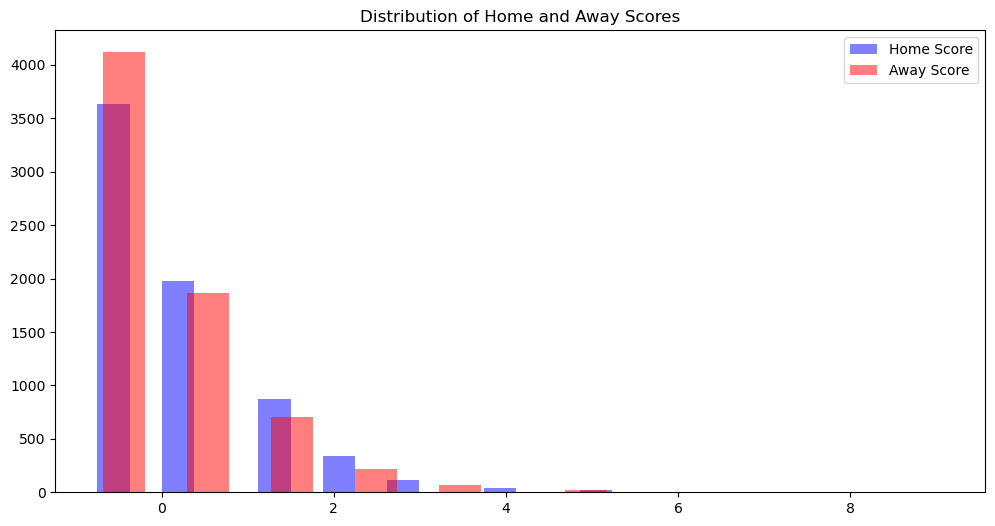

In [10]:
print("\nDistribution of home and away scores:")
plt.figure(figsize=(12, 6))
plt.hist(df['home_score'], bins=20, alpha=0.5, label='Home Score', color='blue')
plt.hist(df['away_score'], bins=20, alpha=0.5, label='Away Score', color='red')
plt.title('Distribution of Home and Away Scores')
plt.legend()
plt.show()

# Linear Regression Model

In [11]:
# Initialize Linear Regression Model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

First, we will perform Linear Regression on the Training set.

In [12]:
# Make predictions on the training set
train_predictions = linreg.predict(X_train)

# Convert predictions to binary (0 or 1)
train_predictions_binary = (train_predictions >= 0.5).astype(int)

To evaluate the model, we will get the training accuracy

In [13]:
# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, train_predictions_binary)
train_conf_matrix = confusion_matrix(y_train, train_predictions_binary)
train_classification_rep = classification_report(y_train, train_predictions_binary)

print("Train Accuracy:", train_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Train Classification Report:\n", train_classification_rep)

Train Accuracy: 0.9408928571428572
Train Confusion Matrix:
 [[4921   15]
 [ 316  348]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4936
           1       0.96      0.52      0.68       664

    accuracy                           0.94      5600
   macro avg       0.95      0.76      0.82      5600
weighted avg       0.94      0.94      0.93      5600



Based on the results, we can see that we got an accuracy of about 94% which indicates that the model predicted the target correctly for 94% of the instances in the train set. 

Train Confusion Matrix:

True Positives: 348
True Negatives: 4921
False Positives: 15
False Negatives: 316

In terms of accuracy, the model has a good performance on the train set in which it correctly predicts the majority class (0) with a high precision and recall value. Though the recall for the minority class (1) is a lower value, which may indicate that the model is not capturing all instances of class (1). 

In [14]:
# Calculate RMSE and R2 Score for the training set
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
train_r2 = r2_score(y_train, train_predictions)

print(f"Training RMSE: {train_rmse}")
print(f"Training R2 Score: {train_r2}")

Training RMSE: 0.21632871778381652
Training R2 Score: 0.5522236252442803


The rmse is at about 22% and the R2 score is about 55%. The R2 score indicates that the model explains about 55% of the variance in the target in the train set.

Now that we have the train accuracy, rmse, and r-squared values, let's visualize our results on a graph.

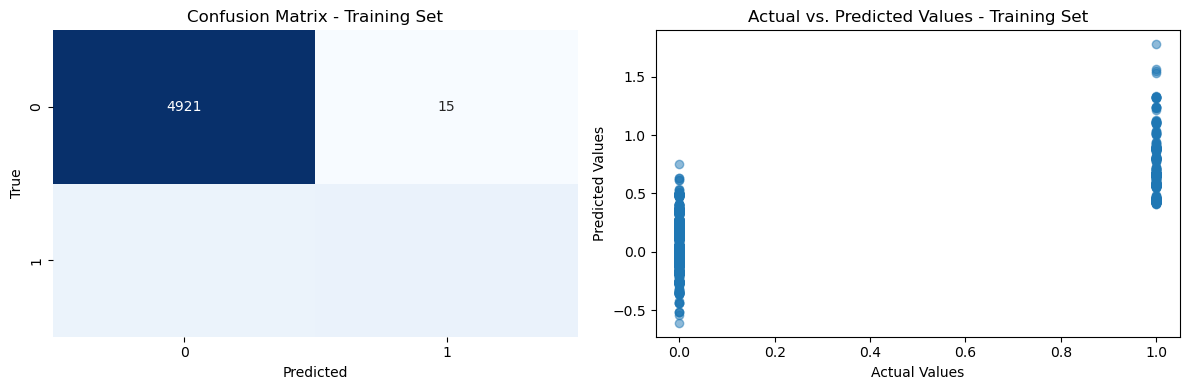

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix - Training Set')

# Scatter Plot for Actual vs. Predicted Values
axes[1].scatter(y_train, train_predictions, alpha=0.5)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Actual vs. Predicted Values - Training Set')
plt.tight_layout()
plt.show()

We will now create a validation set to further assess our model.

In [17]:
# Split the data again for the validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
val_predictions = linreg.predict(X_val)
val_predictions_binary = (val_predictions >= 0.5).astype(int)

We have created the validation set. Now we will evaluate the model on it.

In [20]:
# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, val_predictions_binary)
val_conf_matrix = confusion_matrix(y_val, val_predictions_binary)
val_classification_rep = classification_report(y_val, val_predictions_binary)

print("\nValidation Accuracy:", val_accuracy)
print("Validation Confusion Matrix:\n", val_conf_matrix)
print("Validation Classification Report:\n", val_classification_rep)


Validation Accuracy: 0.9378571428571428
Validation Confusion Matrix:
 [[1232    4]
 [  83   81]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1236
           1       0.95      0.49      0.65       164

    accuracy                           0.94      1400
   macro avg       0.94      0.75      0.81      1400
weighted avg       0.94      0.94      0.93      1400



The model achieved a high accuracy of approximately 93.79% on the validation set. The model performs well in terms of accuracy on the validation set, correctly predicting the majority class (0) with high precision and recall values. Similarly to the train set, recall for the minority class (1) is relatively lower, suggesting that the model may not be capturing all instances of class 1.

Confusion Matrix:

True Positives: 81
True Negatives: 1232
False Positives: 4
False Negatives: 83

Based on the results, we can see that the validation set results are consistent with the training set results.

In [21]:
# Calculate RMSE and R2 Score for the validation set
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
val_r2 = r2_score(y_val, val_predictions)

print(f"Validation RMSE: {val_rmse}")
print(f"Validation R2 Score: {val_r2}")

Validation RMSE: 0.21751802587430472
Validation R2 Score: 0.5425072051005447


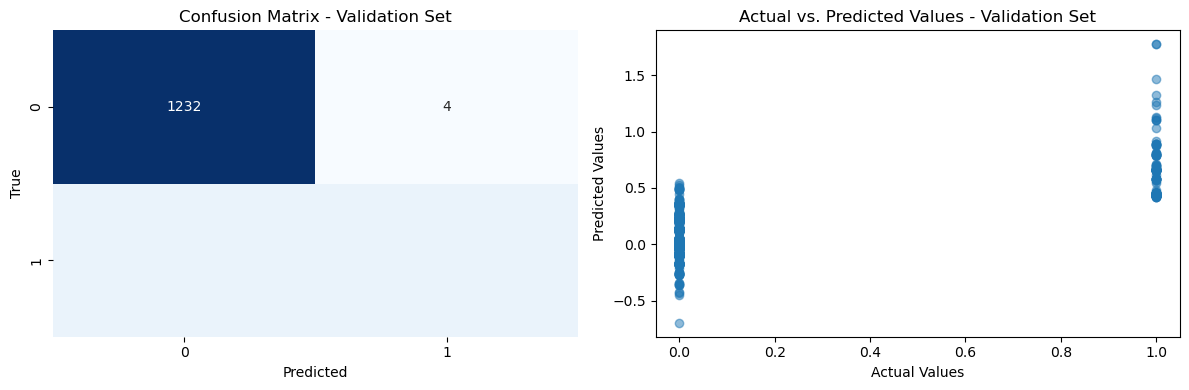

In [23]:
# Confusion Matrix Plot for Validation Set
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix - Validation Set')

# Scatter Plot for Actual vs. Predicted Values - Validation Set
axes[1].scatter(y_val, val_predictions, alpha=0.5)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Actual vs. Predicted Values - Validation Set')

plt.tight_layout()
plt.show()

After evaluating the model on the validation set, we will now evaluate it on the test set.

In [24]:
# Make predictions on the test set
test_predictions = linreg.predict(X_test)
test_predictions_binary = (test_predictions >= 0.5).astype(int)

In [25]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions_binary)
test_conf_matrix = confusion_matrix(y_test, test_predictions_binary)
test_classification_rep = classification_report(y_test, test_predictions_binary)

print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Classification Report:\n", test_classification_rep)

Test Accuracy: 0.9378571428571428
Test Confusion Matrix:
 [[1232    4]
 [  83   81]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1236
           1       0.95      0.49      0.65       164

    accuracy                           0.94      1400
   macro avg       0.94      0.75      0.81      1400
weighted avg       0.94      0.94      0.93      1400



In [26]:
# Calculate RMSE and R2 Score for the test set
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_r2 = r2_score(y_test, test_predictions)

print(f"Test RMSE: {test_rmse}")
print(f"Test R2 Score: {test_r2}")

Test RMSE: 0.21751802587430472
Test R2 Score: 0.5425072051005447


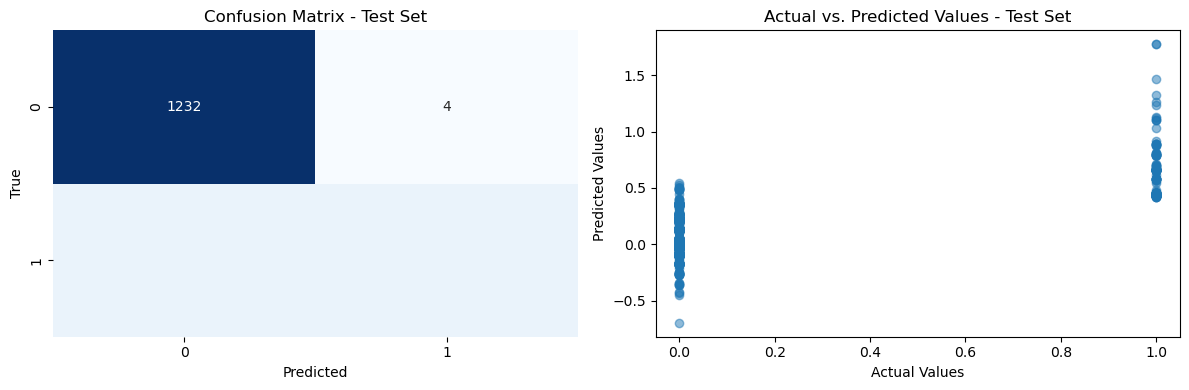

In [27]:
# Confusion Matrix Plot for Test Set
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix - Test Set')

# Scatter Plot for Actual vs. Predicted Values - Test Set
axes[1].scatter(y_test, test_predictions, alpha=0.5)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Actual vs. Predicted Values - Test Set')

plt.tight_layout()
plt.show()

Based on the results of the test set evaluation, we can see that it is consistent with the validation set as both show the same values in terms of accuracy, classification, and confusion matrix. Given the consistency of both results, we can see that we have a robust model. 

Though the model is performing well in terms of accuracy, it still has a shortcoming in capturing the class (1). Further improvements can still be implemented through hyperparameter tuning.

# Hyperparameter Tuning

In [37]:
# Define hyperparameters and their possible values
param_grid = {
    'fit_intercept': [True, False],  # Example hyperparameter
}

# Create GridSearchCV object with scoring='neg_mean_squared_error' for regression
grid_search = GridSearchCV(linreg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the model with the best hyperparameters
tuned_test_predictions = grid_search.predict(X_test)

# Calculate RMSE for the tuned model on the test set
tuned_test_rmse = np.sqrt(mean_squared_error(y_test, tuned_test_predictions))
print(f"Tuned Test RMSE: {tuned_test_rmse}")

# Calculate R2 Score for the tuned model on the test set
tuned_test_r2 = r2_score(y_test, tuned_test_predictions)
print(f"Tuned Test R2 Score: {tuned_test_r2}")

Best Hyperparameters: {'fit_intercept': False}
Tuned Test RMSE: 0.2175065522100125
Tuned Test R2 Score: 0.5425554675862229
